In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [11]:
# Khởi tạo đối tượng CascadeClassifier
plateCascade = cv2.CascadeClassifier('./indian_license_plate.xml')

In [13]:
def plate_detect(img):
    plateImg = img.copy()
    roi = img.copy()
    plateRect = plateCascade.detectMultiScale(plateImg,scaleFactor = 1.2, minNeighbors = 7)
    
    for (x,y,w,h) in plateRect:
        roi_ = roi[y:y+h, x:x+w, :]
        plate_part = roi[y:y+h, x:x+w, :]
        cv2.rectangle(plateImg,(x+2,y),(x+w-3, y+h-5),(0,255,0),3)
    return plateImg, plate_part

In [12]:
# Đọc hình ảnh
image = cv2.imread('../Image/car_1.jpg')

# Phát hiện biển số xe
plateRects = plateCascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5)

# Vẽ khung xung quanh biển số xe
for (x, y, w, h) in plateRects:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Hiển thị hình ảnh
cv2.imshow('Image', image)
cv2.waitKey(0)

-1

In [14]:
def display_img(img):
    img_ = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_)
    plt.show()

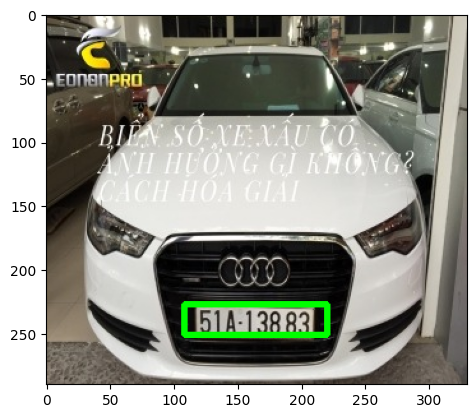

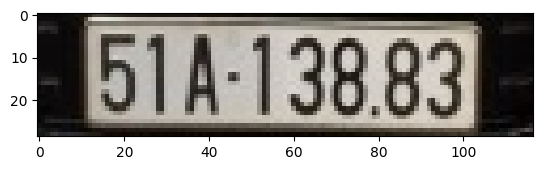

In [59]:
#test image is used for detecting plate
inputImg = cv2.imread('../Image/car_1.jpg')
inpImg, plate = plate_detect(inputImg)
display_img(inpImg)
display_img(plate)

In [25]:
# # im = cv2.imread('test.jpg')
# # assert im is not None, "file could not be read, check with os.path.exists()"
# # imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# # ret, thresh = cv2.threshold(imgray, 127, 255, 0)
# im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [36]:
im = cv2.imread('../Image/car_1.jpg')
img_lp = cv2.resize(image, (333, 75))
img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
_, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
img_binary_lp = cv2.erode(img_binary_lp, (3,3))
img_binary_lp = cv2.dilate(img_binary_lp, (3,3))
im2, contours = cv2.findContours(img_binary_lp, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Hiển thị hình ảnh phân ngưỡng
cv2.imshow('Thresholded Image', img_binary_lp)
cv2.waitKey(0)

-1

In [53]:
def find_contours(dimensions, img):
	

    #finding all contours in the image using 
    #retrieval mode: RETR_TREE
    #contour approximation method: CHAIN_APPROX_SIMPLE
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


    #Approx dimensions of the contours
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    
    #Check largest 15 contours for license plate character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    
    ci = cv2.imread('../Image/contour.jpg')
    
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        #detecting contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        #checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) 
            char_copy = np.zeros((44,24))
            #extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            cv2.rectangle(ci, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ci, cmap='gray')
            char = cv2.subtract(255, char)
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0
            img_res.append(char_copy) # List that stores the character's binary image (unsorted)
            
    #return characters on ascending order with respect to the x-coordinate
            
    plt.show()
    #arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)


    return img_res

In [52]:
def segment_characters(image):
	

    #pre-processing cropped image of plate
    #threshold: convert to pure b&w with sharpe edges
    #erod: increasing the backgroung black
    #dilate: increasing the char white
    img_lp = cv2.resize(image, (333, 75))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))


    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255


    #estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                        LP_WIDTH/2,
                        LP_HEIGHT/10,
                        2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.show()
    cv2.imwrite('../Image/contour.jpg',img_binary_lp)
    cv2.imshow('Thresholded Image', img_binary_lp)
    cv2.waitKey(0)

    #getting contours
    char_list = find_contours(dimensions, img_binary_lp)


    return char_list
	    

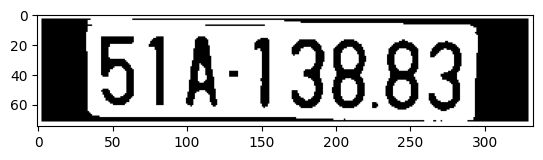

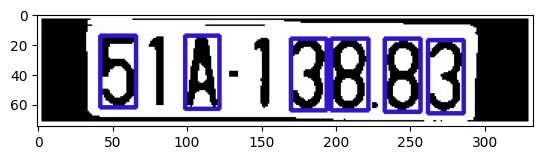

In [54]:
# image = cv2.imread("../Image/car_1.jpg")
char = segment_characters(plate)

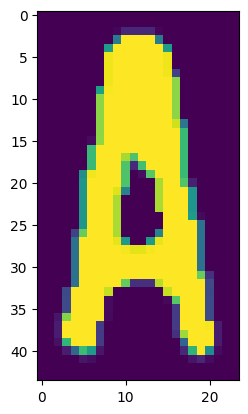

In [60]:
plt.imshow(char[1])
plt.show()

In [68]:
import cv2

# Tải hình ảnh
image = cv2.imread('../Image/canhdepthiennhien.jpg')

# Tạo mô hình phát hiện khuôn mặt
model = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

# Phát hiện khuôn mặt
boxes = model.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), maxSize=(200, 200))

print(boxes)

# Vẽ các hộp chứa khuôn mặt
for (x, y, w, h) in boxes:
   cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)

# Hiển thị hình ảnh
cv2.imshow('Image', image)
cv2.waitKey(0)


()


-1